# Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Loading the "ASDA" supermarket data

In [2]:
asda_data = pd.read_csv('datasets/newdata/All_Data_ASDA.csv')
asda_data.head()

/var/folders/vz/t7hhp_d94_x5_9qpjz3_2bf80000gn/T/ipykernel_91719/1902834642.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  asda_data = pd.read_csv('datasets/newdata/All_Data_ASDA.csv')


,supermarket,prices_(£),prices_unit_(£),unit,names,date,category,own_brand
0,ASDA,45.00,45.00,unit,TP-Link Tapo C310 Outdoor Security Wi-Fi Camera,20240228,home,False
1,ASDA,55.00,55.00,unit,Amazon Echo Dot 5Th Gen Charcoal,20240228,home,False
2,ASDA,20.00,4.00,m,Energizer UK 3 Pin Smart 5m Flexi Strip Light,20240228,home,False
3,ASDA,3.65,0.73,unit,Status Electrical PVC Insulating Tape 10 Metre...,20240228,home,False
4,ASDA,17.00,17.00,unit,Wahl Colour Trim Stubble & Beard Trimmer,20240228,home,False


# Modifying the column names and changing the format of the date column

In [3]:
# Renaming the columns
asda_data.rename(columns={'prices_(£)': 'prices_pounds', 'prices_unit_(£)': 'per_unit_price'}, 
                 inplace=True)
asda_data.head()

,supermarket,prices_pounds,per_unit_price,unit,names,date,category,own_brand
0,ASDA,45.00,45.00,unit,TP-Link Tapo C310 Outdoor Security Wi-Fi Camera,20240228,home,False
1,ASDA,55.00,55.00,unit,Amazon Echo Dot 5Th Gen Charcoal,20240228,home,False
2,ASDA,20.00,4.00,m,Energizer UK 3 Pin Smart 5m Flexi Strip Light,20240228,home,False
3,ASDA,3.65,0.73,unit,Status Electrical PVC Insulating Tape 10 Metre...,20240228,home,False
4,ASDA,17.00,17.00,unit,Wahl Colour Trim Stubble & Beard Trimmer,20240228,home,False


In [4]:
# Correcting data types: Convert the 'date' column to datetime format
asda_data['date'] = pd.to_datetime(asda_data['date'], format='%Y%m%d')

In [5]:
print("The shape of the ASDA dataset is {}".format(asda_data.shape))

The shape of the ASDA dataset is (1299188, 8)


In [6]:
print("The column names in ASDA dataset - {}".format(asda_data.columns))

The column names in ASDA dataset - Index(['supermarket', 'prices_pounds', 'per_unit_price', 'unit', 'names',
       'date', 'category', 'own_brand'],
      dtype='object')


# Information about the data

In [7]:
# Get a concise summary of the DataFrame
asda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299188 entries, 0 to 1299187
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   supermarket     1299188 non-null  object        
 1   prices_pounds   1299184 non-null  float64       
 2   per_unit_price  1299078 non-null  float64       
 3   unit            1299078 non-null  object        
 4   names           1299167 non-null  object        
 5   date            1299188 non-null  datetime64[ns]
 6   category        1299188 non-null  object        
 7   own_brand       1299167 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 79.3+ MB


# Statistical Overview of the numerical columns

In [8]:
asda_data.describe()

,prices_pounds,per_unit_price,date
count,1.299184e+06,1.299078e+06,1299188
mean,5.749758e+00,7.430772e+01,2024-02-03 11:25:32.751842048
min,5.000000e-02,0.000000e+00,2024-01-09 00:00:00
25%,1.700000e+00,3.400000e+00,2024-01-21 00:00:00
50%,3.000000e+00,7.500000e+00,2024-02-05 00:00:00
75%,6.500000e+00,1.580000e+01,2024-02-17 00:00:00
max,4.799900e+02,9.977800e+04,2024-02-28 00:00:00
std,9.363229e+00,1.110266e+03,NaN


# Checking for null values

In [9]:
# Check for missing values
asda_data.isnull().sum()

supermarket         0
prices_pounds       4
per_unit_price    110
unit              110
names              21
date                0
category            0
own_brand          21
dtype: int64

### Checking for null values

In [10]:
# Checking which rows are null
asda_null = asda_data[asda_data.isnull().any(axis=1)]
print(asda_null)

        supermarket  prices_pounds  per_unit_price unit  \
10349          ASDA          35.25             NaN  NaN   
10359          ASDA           7.80             NaN  NaN   
50690          ASDA          35.25             NaN  NaN   
50695          ASDA           7.80             NaN  NaN   
61415          ASDA          35.25             NaN  NaN   
...             ...            ...             ...  ...   
1253063        ASDA           3.00             NaN  NaN   
1254655        ASDA          35.25             NaN  NaN   
1257709        ASDA           7.80             NaN  NaN   
1277430        ASDA           3.00             NaN  NaN   
1278490        ASDA           3.00             NaN  NaN   

                                                     names       date  \
10349           Signature Red Filter Multipack 5x10 Cigars 2024-02-28   
10359                            Signature Original Cigars 2024-02-28   
50690           Signature Red Filter Multipack 5x10 Cigars 2024-02-27   

## Dropping the rows with missing values in the `names` column

In [11]:
# Droping the rows with missing values in the 'names' column
asda_data.dropna(subset=['names'], inplace=True)

rows_starting_with_redFilter = asda_data[asda_data['names'].str.startswith('Signature Red Filter Multipack 5x10 Cigars')]
#print(rows_starting_with_redFilter)

product_name = "Signature Red Filter Multipack 5x10 Cigars"
per_unit_price = 7.05
unit = "unit"

# Imputing null values for the specific product
asda_data.loc[asda_data['names'] == product_name, 'unit'] = asda_data.loc[asda_data['names'] == product_name, 'unit'].fillna(unit)
asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'] = asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(asda_data[asda_data['names'] == product_name])

## Imputing the null values

In [12]:
rows_starting_with_original = asda_data[asda_data['names'].str.startswith('Signature Original Cigars')]
#print(rows_starting_with_original)

product_name = "Signature Original Cigars"
per_unit_price = 0.78
unit = "unit"

# Imputing null values for the specific product
asda_data.loc[asda_data['names'] == product_name, 'unit'] = asda_data.loc[asda_data['names'] == product_name, 'unit'].fillna(unit)
asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'] = asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(asda_data[asda_data['names'] == product_name])

In [13]:
rows_starting_with_Tea = asda_data[asda_data['names'].str.startswith('Original Source Tingly Mint & Tea Tree Shower Refill')]
#print(rows_starting_with_Tea)

product_name = "Original Source Tingly Mint & Tea Tree Shower Refill"
per_unit_price = 3.0
unit = "l"

# Imputing null values for the specific product
asda_data.loc[asda_data['names'] == product_name, 'unit'] = asda_data.loc[asda_data['names'] == product_name, 'unit'].fillna(unit)
asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'] = asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(asda_data[asda_data['names'] == product_name])

In [14]:
rows_starting_with_sheaButter = asda_data[asda_data['names'].str.startswith('Original Source Tropical Coconut & Shea Butter Shower Refill')]
#print(rows_starting_with_sheaButter)

product_name = "Original Source Tropical Coconut & Shea Butter Shower Refill"
per_unit_price = 3.0
unit = "l"

# Imputing null values for the specific product
asda_data.loc[asda_data['names'] == product_name, 'unit'] = asda_data.loc[asda_data['names'] == product_name, 'unit'].fillna(unit)
asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'] = asda_data.loc[asda_data['names'] == product_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(asda_data[asda_data['names'] == product_name])

## Cross checking if any null values are present after dropping/imputing

In [15]:
asda_data.isnull().sum()

supermarket       0
prices_pounds     0
per_unit_price    0
unit              0
names             0
date              0
category          0
own_brand         0
dtype: int64

# Visualizations

## Line graph for price trends over time

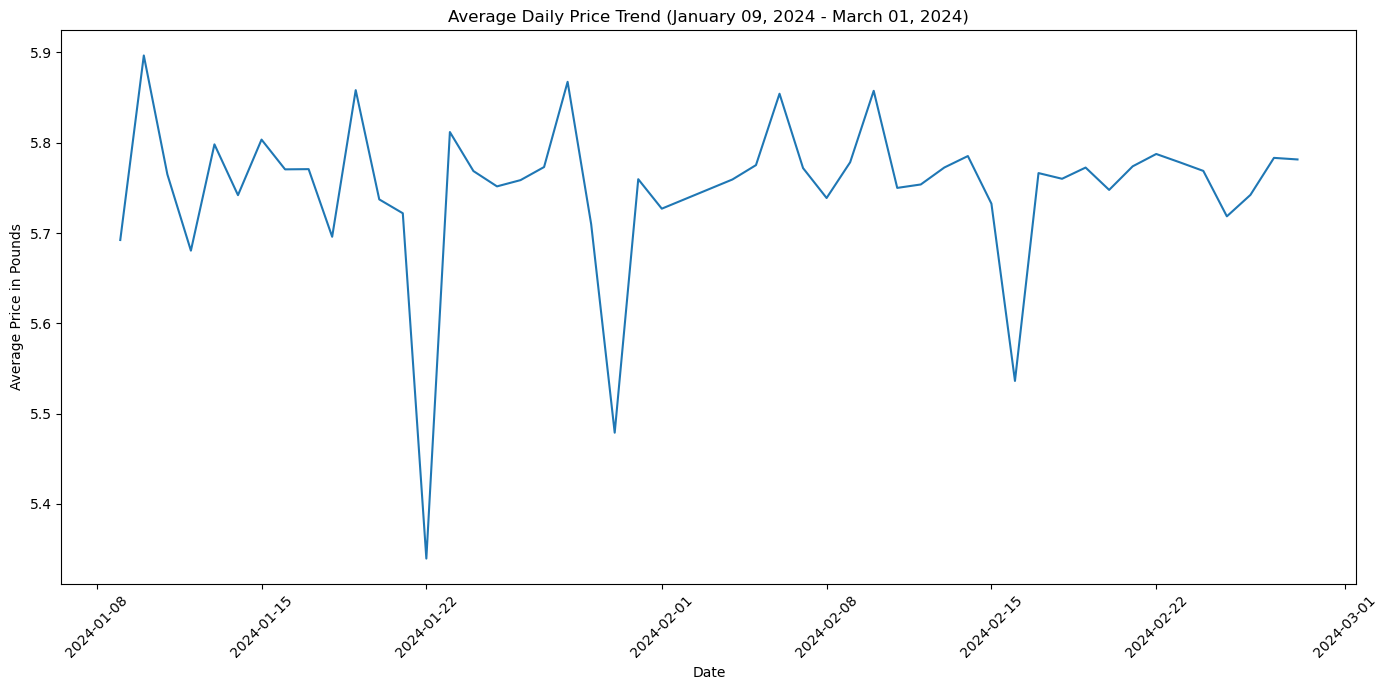

In [16]:
# Price Trends Over Time
# Adjusting for daily price trends
asda_data['date'] = pd.to_datetime(asda_data['date'])  # Ensure 'date' is in datetime format
daily_price_trends = asda_data.groupby(asda_data['date'])['prices_pounds'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_price_trends, x='date', y='prices_pounds')
plt.title('Average Daily Price Trend (January 09, 2024 - March 01, 2024)')
plt.xlabel('Date')
plt.ylabel('Average Price in Pounds')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

## Overall price distribution using a Histogram

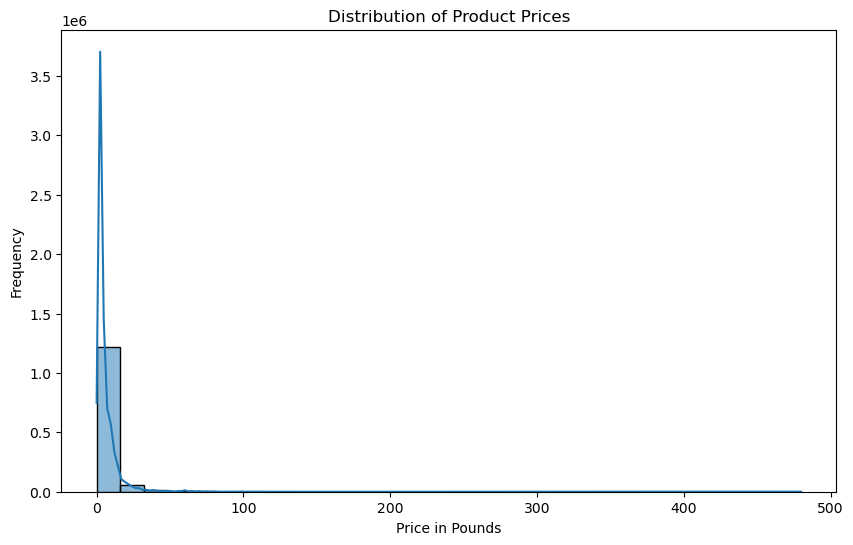

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(asda_data['prices_pounds'], 
             bins=30, 
             kde=True)

plt.title('Distribution of Product Prices')
plt.xlabel('Price in Pounds')
plt.ylabel('Frequency')
plt.show()

## Bar chart showing the number of products per category

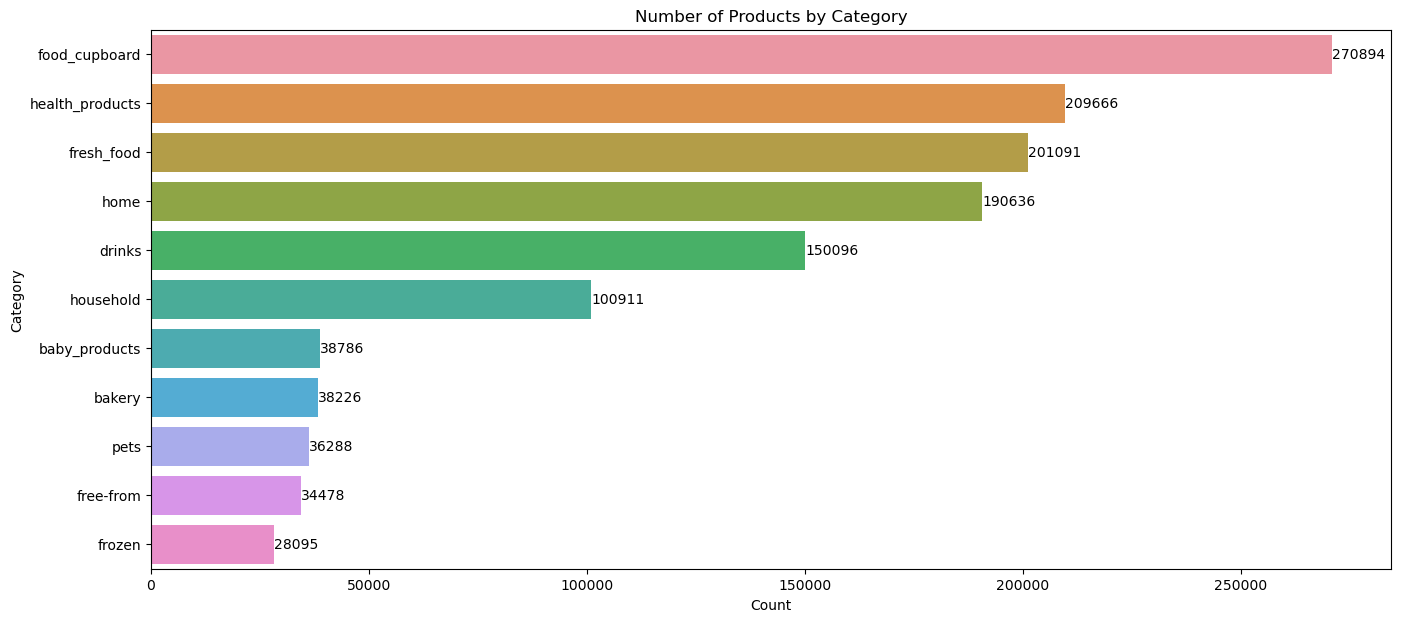

In [21]:
plt.figure(figsize=(16, 7))
sns.countplot(y='category', 
              data=asda_data, 
              order=asda_data['category'].value_counts().index)

plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')

# Adding annotations
for i, count in enumerate(asda_data['category'].value_counts()):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

## Calculating the average price per category

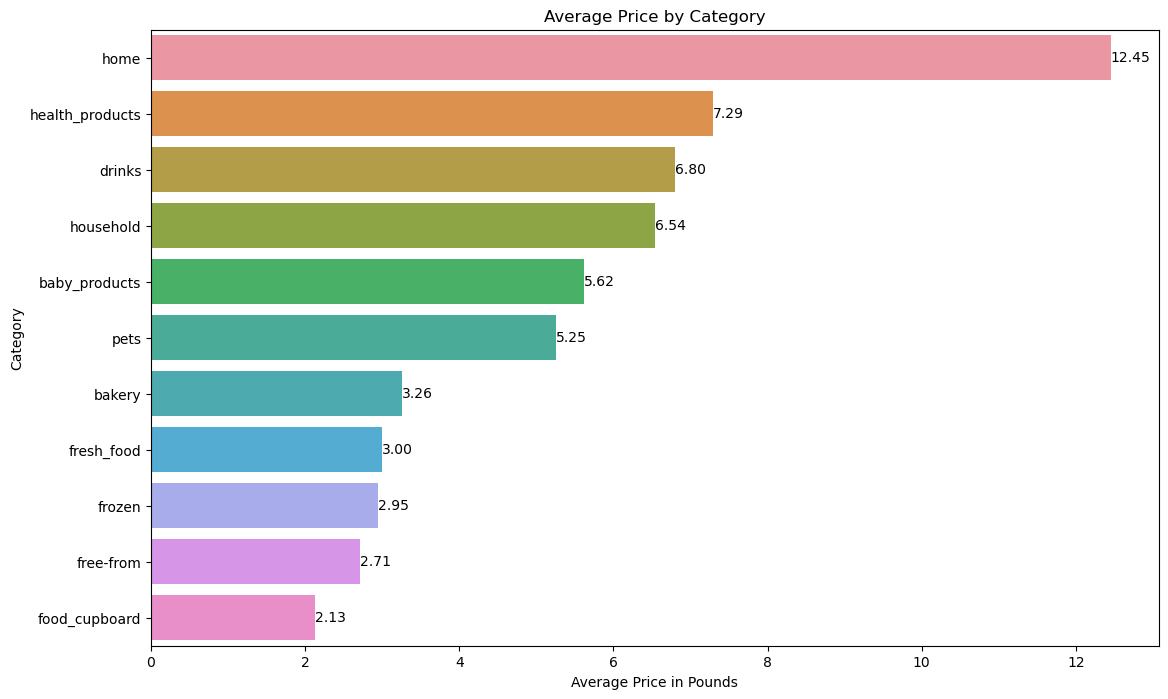

In [23]:
average_price_per_category = asda_data.groupby('category')['prices_pounds'].mean().reset_index().sort_values(by='prices_pounds', ascending=False)

# Bar chart showing the average price per category
plt.figure(figsize=(13, 8))
sns.barplot(x='prices_pounds', 
            y='category', 
            data=average_price_per_category)

plt.title('Average Price by Category')
plt.xlabel('Average Price in Pounds')
plt.ylabel('Category')

# Adding annotations
for i, price in enumerate(average_price_per_category['prices_pounds']):
    plt.text(price, i, '{:.2f}'.format(price), ha='left', va='center')

plt.show()

## Box plot for distribution of prices for each product category

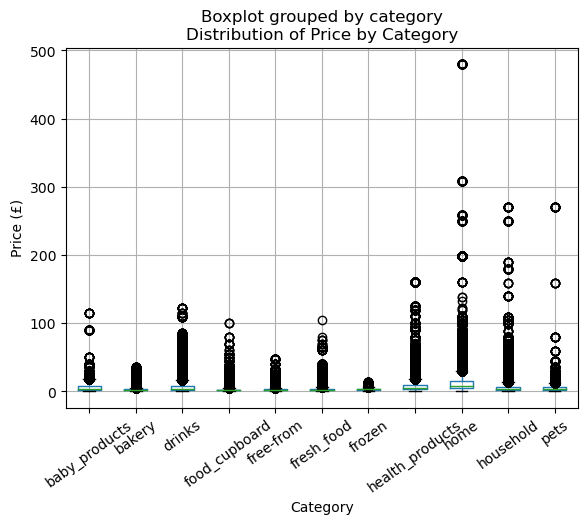

In [24]:
asda_data.boxplot(column = "prices_pounds", by = "category")
plt.title("Distribution of Price by Category")
plt.xlabel("Category")
plt.ylabel("Price (£)")
plt.xticks(rotation = 36)
plt.show()

## Pie chart for proportion of prices contributed by each product category

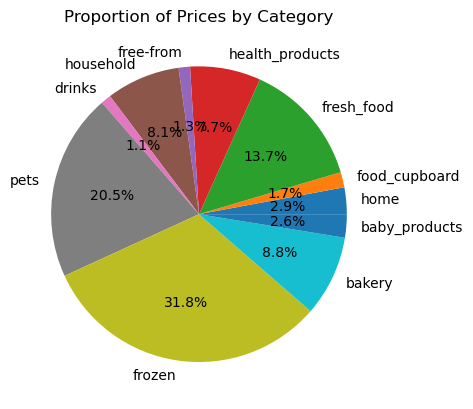

In [26]:
# Pie chart
plt.pie(asda_data.groupby("category")["prices_pounds"].sum(), 
        labels = asda_data["category"].unique(), 
        autopct = '%1.1f%%')

plt.title("Proportion of Prices by Category")

plt.show()

## ASDA Own Brand items count

In [37]:
asda_ownBrand_value = asda_data['own_brand'].value_counts()
print("\nNumber of items owned by ASDA and not owned by ASDA:\n{}".format(asda_ownBrand_value))


Number of items owned by ASDA and not owned by ASDA:
own_brand
False    917220
True     381947
Name: count, dtype: int64


## Average Price Comparison: Own Brand vs. Non-Own Brand

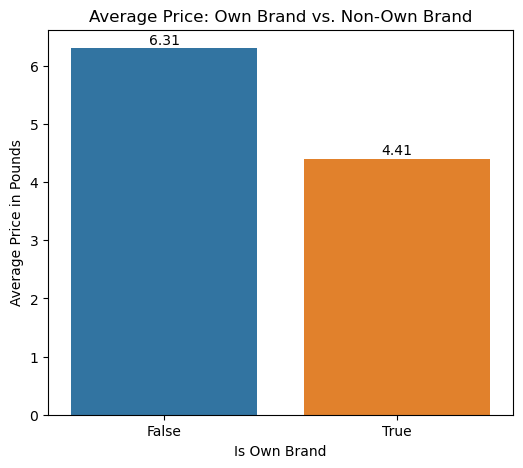

In [34]:
own_brand_prices_asda = asda_data.groupby('own_brand')['prices_pounds'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='own_brand', 
            y='prices_pounds', 
            data=own_brand_prices)
plt.title('Average Price: Own Brand vs. Non-Own Brand')
plt.xlabel('Is Own Brand')
plt.ylabel('Average Price in Pounds')

# Displaying values on top of bars with a little gap
for index, row in own_brand_prices_asda.iterrows():
    plt.text(index, row['prices_pounds'] + 0.07, round(row['prices_pounds'], 2), 
             color = 'black', 
             ha = "center")
    
plt.show()

## Correlation Matrix

In [35]:
# Extract only the 'date' column and 'prices_pounds' column
asda_data_corr = asda_data[['date', 'prices_pounds']]

# Compute correlation matrix
correlation_matrix_asda = asda_data_corr.corr()

print("Correlation Matrix:")
print(correlation_matrix_asda)

Correlation Matrix:
                 date  prices_pounds
date           1.0000         0.0005
prices_pounds  0.0005         1.0000


## Different values present within `category`

In [36]:
asda_category_value = asda_data['category'].value_counts()
print("\nThe different values in category:\n{}".format(asda_category_value))


The different values in category:
category
food_cupboard      270894
health_products    209666
fresh_food         201091
home               190636
drinks             150096
household          100911
baby_products       38786
bakery              38226
pets                36288
free-from           34478
frozen              28095
Name: count, dtype: int64


In [38]:
# Create a more descriptive label for 'own_brand'
#asda_data['brand_type'] = asda_data['own_brand'].apply(lambda x: 'Own Brand' if x else 'Other Brands')

# Plotting with enhanced labeling and product count
#plt.figure(figsize=(8, 6))
#sns.barplot(x='brand_type', y='prices_pounds', data=asda_data, estimator=np.mean, ci=None)
#plt.title('Average Price: Own Brand vs. Other Brands')
#plt.xlabel('')
#plt.ylabel('Average Price in Pounds')

# Adding text annotations for the number of products
#num_own_brand = len(asda_data[asda_data['own_brand'] == True])
#num_other_brands = len(asda_data[asda_data['own_brand'] == False])
#total_counts = [num_own_brand, num_other_brands]
#for index, value in enumerate(total_counts):
#    plt.text(index, 0, f'n={value}', ha='center', va='bottom', color='black')

#plt.show()

# Re-categorizing

## For `drinks`

In [39]:
keywords_drinks = {
    'hot_beverages': ['hot', 'chocolate', 'coffee', 'cappuccino', 'espresso', 'tea', 'chai', 'cocoa'],
    
    'cold_beverages': ['water', 'soda', 'juice', 'iced', 'drink', 'cordial', 'smoothie', 'energy drink', 
                       'sugar', 'Coca-Cola', 'Diet Coke'],
    
    'alcoholic_beverages': ['wine', 'prosecco', 'sauvignon', 'malbec', 'cava', 'beer', 'cider', 
                            'stout', 'ale', 'lager'],
    
    'non_alcoholic_beverages': ['soft', 'non', 'alcoholic', 'kombucha', 'health'],
    
    'coffee_and_tea_related': ['coffee', 'beans', 'pods', 'ground', 'tea', 'bags', 'herbal']
}

# Ensure 'names' column is always treated as string
asda_data['names'] = asda_data['names'].astype(str)

# Function to assign drinks subcategory based on keywords using NLTK
def assign_drinks_subcategory_nltk(name):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Check tokens against keywords
    for category, kw_list in keywords_drinks.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_drinks'

# Apply the function to rows in the 'drinks' category
asda_data.loc[asda_data['category'] == 'drinks', 'category'] = asda_data[asda_data['category'] == 'drinks']['names'].apply(assign_drinks_subcategory_nltk)

# Save the updated DataFrame
asda_data.to_csv('datasets/newdata/updated_All_Data_ASDA.csv', index=False)